<a href="https://colab.research.google.com/github/LeonidGrekhov/CMPE297Section1FinalProject/blob/main/craigslistAds3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6
https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
5
https://raleigh.craigslist.org/search/cta?s=120&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
4
https://raleigh.craigslist.org/search/cta?s=240&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
3
https://raleigh.craigslist.org/search/cta?s=360&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
2
https://raleigh.craigslist.org/search/cta?s=480&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
1
https://raleigh.craigslist.org/search/cta?s=600&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
6
https://boone.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
5
https://boone.craigslist.org/search/cta?s=120&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
4
https://boone.craigslist.org/search/cta?s=240&min_price=500&ma

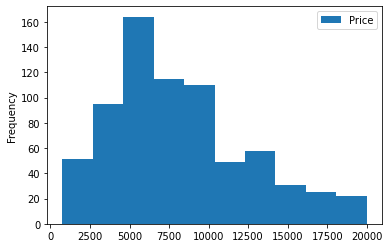

Boone


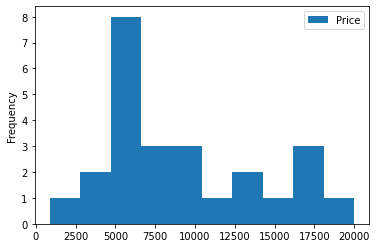

In [1]:
from bs4 import BeautifulSoup #web scraping

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import re
import requests #http requests
from requests import get
from urllib.request import urlopen
def craigs_list(locations, min_price, max_price, min_year, max_year):
    
    dfs = []
    master = []

    for location in locations:
        
        s = 0
        ##https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
        ##https://sfbay.craigslist.org/search/cta?hasPic=1#search=1~gallery~0~0
        url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
        r  = requests.get(url)
        html_page = r.text
        soup = BeautifulSoup(html_page, "lxml")
        #total = str(soup.findAll("span", {"class": "totalcount"})[0].contents)[2:-2]
        count = 6
        
        while(count > 0):
            print(count)
            url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
            print(url)
            r  = requests.get(url)
            html_page = r.text
            soup = BeautifulSoup(html_page, "lxml")
            
            values = add_to_df(soup)
            s = s + 120
            count = count - 1


            craig_df = pd.DataFrame(np.column_stack([values[0], values[1], values[2],values[3], values[4], values[5]]),
                columns = ["Price", "Location","Title","Link", "Date", "Description"])
            craig_df = craig_df.dropna()
           
            dfs.append(craig_df)
        
            craig_df = 0
            
        #concat all dfs here
        d = pd.concat(dfs)
        master.append(d)
        d=[]
        dfs = []
        
    
    return master
    
	
	
def graph_cars(df):
    df2 = df.iloc[:, :2].copy()
    df2['Price'] = df2['Price'].str[1:]
    df2['Price'] = df2['Price'].str.replace(',', '').astype(int)
    df2.plot(kind='hist', y = "Price")
    plt.show()
	
def remove_html_tags(text):
    substring = "QR Code Link to This Post"
    text = text.split(substring)
    text = re.sub("{<p[^>]*</p>}", "", text[1])
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def remove_empty_line(text):
    clean = re.compile('^(?:[\t ]*(?:\r?\n|\r))+')
    return re.sub(clean, '', text)

def add_to_df(soup):
    link_list = []
    listing_price = []
    prices = []
    hoods = []
    titles = []
    make_model = []
    year = []
    miles = []
    odometer = []
    date = []
    description = []
   
 
    for car in soup.find_all('li', class_= 'result-row'):
            
        try:
            location = str(car.find(class_ = "result-hood").contents)
            hoods.append(location[4:-3])
        except:
            hoods.append('N/A')
                
        try:
            prices.append(car.find(class_ = "result-price").contents)
        except:
            #not possible
            prices.append('N/A')
                
        try:
            titles.append(car.find(class_ = "result-title hdrlnk").contents)
        except:
            titles.append('N/A')
                
        try:
            date.append(car.find(class_ = "result-date").contents)
        except:
            date.append('N/A')
        
        
        try:
            requests = get(car.find('a')['href'])
            html_soup = BeautifulSoup(requests.text, "lxml")
            posting_body=html_soup.find('section',{'id':'postingbody'})
            posting_body= remove_html_tags(str(posting_body.text))
            text = remove_empty_line(posting_body)
            description.append(text)
        except:
            description.append('N/A')
                   
        
    for car in soup.findAll("a", {"class": "result-title hdrlnk"}):
        link_list.append(car['href'])
        
        

    return [prices, hoods, titles, link_list, date, description]
	
	
	
locations = ["raleigh", "boone"]
min_price = 500
max_price= 20000
min_year = 2000
max_year = 2010
df = craigs_list(locations, min_price, max_price, min_year, max_year)
	
	
print("Raleigh")
graph_cars(df[0])
print("Boone")
graph_cars(df[1])


# Description Data Frame
# Addition: Car model, Vin, Condition, drive, fuel, odometer, title status, transmission, type

In [2]:
df1 = pd.DataFrame(df[0]) 
df2 = pd.DataFrame(df[1]) 

In [3]:
display(df1)

,Price,Location,Title,Link,Date,Description
0,"$7,800",Wake Forest,2004 E-350 Super Duty,https://raleigh.craigslist.org/cto/d/youngsvil...,Oct 23,Great 15’ Box Truck!!! Everything works as sho...
1,"$3,500",Durham,2002 Hyundai Accent Hatchback GL,https://raleigh.craigslist.org/cto/d/durham-20...,Oct 23,2002 Hyundai Accent GL Hatchback. Only 61000 M...
2,"$5,100","Hillsborough, NC",2008 Mercury GMarq,https://raleigh.craigslist.org/cto/d/hillsboro...,Oct 23,Nice car - two owners\nlow mileage\n
3,"$3,600",Bailey,2004 Tahoe,https://raleigh.craigslist.org/cto/d/bailey-20...,Oct 23,2004 tahoe z71\nBody in great shape 4x4 works ...
4,"$14,500",Chapel Hill,2004 E-320 Mercedes Wagon,https://raleigh.craigslist.org/cto/d/chapel-hi...,Oct 23,"Beautiful to see and a pleasure to drive, this..."
...,...,...,...,...,...,...
115,"$16,999",Cardinal Auto Sales,2003 Dodge Ram 3500 Quad Cab 1605 in WB DRW SLT,https://raleigh.craigslist.org/ctd/d/raleigh-2...,Sep 26,2003 Dodge Ram 3500 Quad Cab 1605 in WB DRW SL...
116,"$9,990",Raleigh NC,2003 Lexus ES 300,https://raleigh.craigslist.org/ctd/d/memphis-2...,Sep 26,"2003 Lexus ES 300 - $9,990\n\nYear: 2003\nMake..."
117,"$11,990",Raleigh NC,2003 Toyota 4Runner Limited,https://raleigh.craigslist.org/ctd/d/memphis-2...,Sep 26,"2003 Toyota 4Runner Limited - $11,990\n\nYear:..."
118,"$5,990",Raleigh NC,2005 Nissan Xterra,https://raleigh.craigslist.org/ctd/d/memphis-2...,Sep 26,"2005 Nissan Xterra - $5,990\n\nYear: 2005\nMak..."


In [4]:
display(df2)

,Price,Location,Title,Link,Date,Description
0,"$6,000",Boone,2006 Honda CR-V Special Edition,https://boone.craigslist.org/cto/d/boone-2006-...,Oct 22,"6000 OBO price isn’t firm\n\nHas remote start,..."
1,"$8,000",Boone,2006 Ford E 450 Van,https://boone.craigslist.org/cto/d/boone-2006-...,Oct 22,2006 Ford E 450 gas Passenger Van. Luxury viny...
2,"$9,500",West Jefferson NC,2006 Mazda Miata,https://boone.craigslist.org/cto/d/west-jeffer...,Oct 21,Well kept Miata with 6-speed manual. Grand Tou...
3,"$15,000",Boone,Subaru Sti 2008,https://boone.craigslist.org/cto/d/boone-subar...,Oct 21,I’m selling my 08 sti hatch because it recentl...
4,"$12,590",TOUCHLESS DELIVERY TO YOUR HOME,2009 Volvo C30 T5 Hatchback 2D hatchback White...,https://boone.craigslist.org/ctd/d/boone-2009-...,Oct 21,"At Carvana, we go miles beyond the extra mile...."
5,"$12,990",TOUCHLESS DELIVERY TO YOUR HOME,2009 smart fortwo Passion Cabriolet 2D Convert...,https://boone.craigslist.org/ctd/d/boone-2009-...,Oct 19,"At Carvana, we go miles beyond the extra mile...."
6,"$4,950",Jonesville,2004 Honda Pilot EX,https://boone.craigslist.org/ctd/d/jonesville-...,Oct 18,V-6 Automatic. All Wheel Drive.\nPower Window...
7,"$10,000","Boone, NC",2010 Subaru Forester,https://boone.craigslist.org/cto/d/boone-2010-...,Oct 18,"Clean with ALL NEW... premium head gasket,timi..."
8,"$12,000",N/A,2004 f250,https://boone.craigslist.org/cto/d/west-jeffer...,Oct 16,2004 f250 lariat crew cab powerstroke was conv...
9,"$4,300",Boone,2009 NISSAN ALTIMA 2.5S,https://boone.craigslist.org/cto/d/boone-2009-...,Oct 16,"2009 NISSAN ALTIMA 2.5S 130,500 original miles..."


In [5]:
df1.iloc[1]['Description']

'2002 Hyundai Accent GL Hatchback. Only 61000 Miles. Oil and oil filter changed every 5000 miles and seafoam added. Transmission fluid was changed 7000 miles ago. Car did not sit and has gotten consistent use for the last few years. This is my daily use vehicle to work. New charcoal filter. Good tires. Everything works. Clean title. Never been in an accident.\n\nHas a few dings from idiots in the parking lot, takes a while to fill the gas tank because the fuel lines need to be blown out. New spark plugs. New fuel filter. Passed inspection a few months ago. All lights works. Car runs great and is good on gas. Car comes with a free tinting kit (i never got around to doing it). Ac works great. Hot heat and cold air. No cracks in Winshield or glass. Has a nice aftermarket radio. This is a great deal for anyone who is handy and looking for a gas sipper.\n    '

In [6]:
from google.colab import files

df1.to_csv('df1.csv', encoding = 'utf-8-sig') 
files.download('df1.csv')
df2.to_csv('df2.csv', encoding = 'utf-8-sig') 
files.download('df2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df1.size

4320

In [8]:
text =str(df1.iloc[1]['Description'])

In [9]:
pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 5.3 MB 10.0 MB/s 
     |████████████████████████████████| 1.3 MB 52.3 MB/s 
     |████████████████████████████████| 441 kB 71.5 MB/s 
     |████████████████████████████████| 212 kB 68.8 MB/s 
     |████████████████████████████████| 115 kB 72.1 MB/s 
     |████████████████████████████████| 163 kB 77.7 MB/s 
     |████████████████████████████████| 127 kB 70.1 MB/s 
     |████████████████████████████████| 7.6 MB 54.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [10]:
from happytransformer import  HappyTextToText

In [11]:
happy_tt = HappyTextToText("DISTILBART", "sshleifer/distilbart-cnn-12-6")

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [12]:
result = happy_tt.generate_text(text)

In [13]:
print(result.text)

 2002 Hyundai Accent GL Hatchback has 61,000 miles . Oil and oil filter changed every 5000 miles . Has a nice aftermarket radio .


In [14]:
from happytransformer.happy_text_to_text import TTSettings
top_k_sampling_settings = TTSettings(do_sample=True, top_k=100, temperature=0.7, max_length=100)

In [15]:
result = happy_tt.generate_text(text, args= top_k_sampling_settings)

In [16]:
print(result.text)

 2002 Hyundai Accent GL Hatchback only 61000 miles . Uses seafoam filter, engine and fuel line trouble . Has no cracks in Winshield or glass .


In [17]:
df1.iloc[1]['Description']

'2002 Hyundai Accent GL Hatchback. Only 61000 Miles. Oil and oil filter changed every 5000 miles and seafoam added. Transmission fluid was changed 7000 miles ago. Car did not sit and has gotten consistent use for the last few years. This is my daily use vehicle to work. New charcoal filter. Good tires. Everything works. Clean title. Never been in an accident.\n\nHas a few dings from idiots in the parking lot, takes a while to fill the gas tank because the fuel lines need to be blown out. New spark plugs. New fuel filter. Passed inspection a few months ago. All lights works. Car runs great and is good on gas. Car comes with a free tinting kit (i never got around to doing it). Ac works great. Hot heat and cold air. No cracks in Winshield or glass. Has a nice aftermarket radio. This is a great deal for anyone who is handy and looking for a gas sipper.\n    '

In [19]:
# T5
happy_t5 = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


summarize: 2002 Hyundai Accent GL Hatchback. Only 61000 Miles. Oil and oil filter changed every 5000 miles and seafoam added. Transmission fluid was changed 7000 miles ago. Car did not sit and has gotten consistent use for the last few years. This is my daily use vehicle to work. New charcoal filter. Good tires. Everything works. Clean title. Never been in an accident.

Has a few dings from idiots in the parking lot, takes a while to fill the gas tank because the fuel lines need to be blown out. New spark plugs. New fuel filter. Passed inspection a few months ago. All lights works. Car runs great and is good on gas. Car comes with a free tinting kit (i never got around to doing it). Ac works great. Hot heat and cold air. No cracks in Winshield or glass. Has a nice aftermarket radio. This is a great deal for anyone who is handy and looking for a gas sipper.
    


In [20]:
input = "summarize: " + text
print(input)

summarize: 2002 Hyundai Accent GL Hatchback. Only 61000 Miles. Oil and oil filter changed every 5000 miles and seafoam added. Transmission fluid was changed 7000 miles ago. Car did not sit and has gotten consistent use for the last few years. This is my daily use vehicle to work. New charcoal filter. Good tires. Everything works. Clean title. Never been in an accident.

Has a few dings from idiots in the parking lot, takes a while to fill the gas tank because the fuel lines need to be blown out. New spark plugs. New fuel filter. Passed inspection a few months ago. All lights works. Car runs great and is good on gas. Car comes with a free tinting kit (i never got around to doing it). Ac works great. Hot heat and cold air. No cracks in Winshield or glass. Has a nice aftermarket radio. This is a great deal for anyone who is handy and looking for a gas sipper.
    


In [21]:
t5_result = happy_t5.generate_text(input)

the 2002 Hyundai Accent GL Hatchback has only 61000 miles . oil and oil filter changed every 5000 miles and seafoam added . car runs great and is good on gas .


In [25]:
# DistilBART
print(result.text)
# T5
print(t5_result.text)

 2002 Hyundai Accent GL Hatchback only 61000 miles . Uses seafoam filter, engine and fuel line trouble . Has no cracks in Winshield or glass .
the 2002 Hyundai Accent GL Hatchback has only 61000 miles . oil and oil filter changed every 5000 miles and seafoam added . car runs great and is good on gas .
